In [1]:
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
axum= pd.read_csv("../results/axum_native.csv")
fastapi = pd.read_csv("../results/fastapi_native.csv")

In [3]:
print("Native Times:")
print(f"median: {(axum['time(ms)']/fastapi['time(ms)']).median():.3f}")
print(f"mean: {(axum['time(ms)']/fastapi['time(ms)']).mean():.3f}")
print(f"hmean: {scipy.stats.hmean(axum['time(ms)'] / fastapi['time(ms)']):.3f}")

Native Times:
median: 0.945
mean: 0.967
hmean: 0.958


In [4]:
axum= pd.read_csv("../results/axum_docker_linux.csv")
fastapi = pd.read_csv("../results/fastapi_docker_linux.csv")

In [5]:
print("Docker Times:")
print(f"median: {(axum['time(ms)']/fastapi['time(ms)']).median():.3f}")
print(f"mean: {(axum['time(ms)']/fastapi['time(ms)']).mean():.3f}")
print(f"hmean: {scipy.stats.hmean(axum['time(ms)'] / fastapi['time(ms)']):.3f}")


Docker Times:
median: 0.938
mean: 0.945
hmean: 0.935


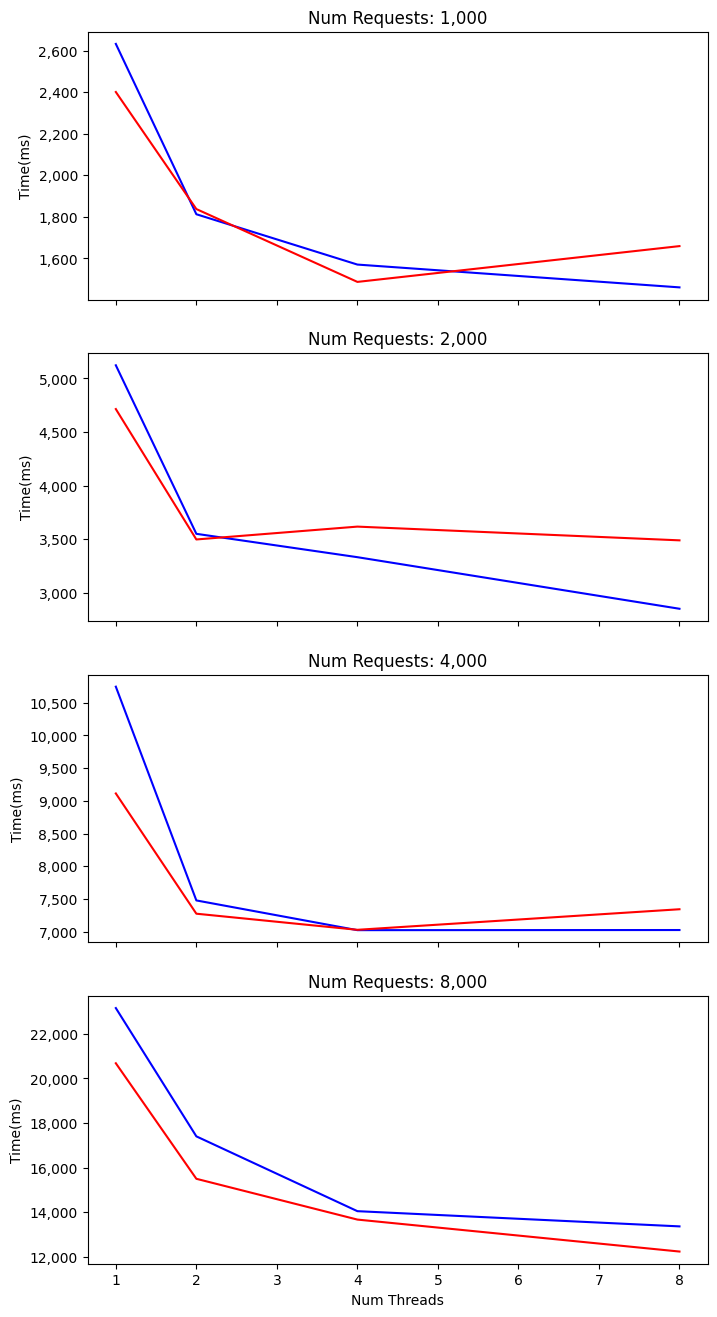

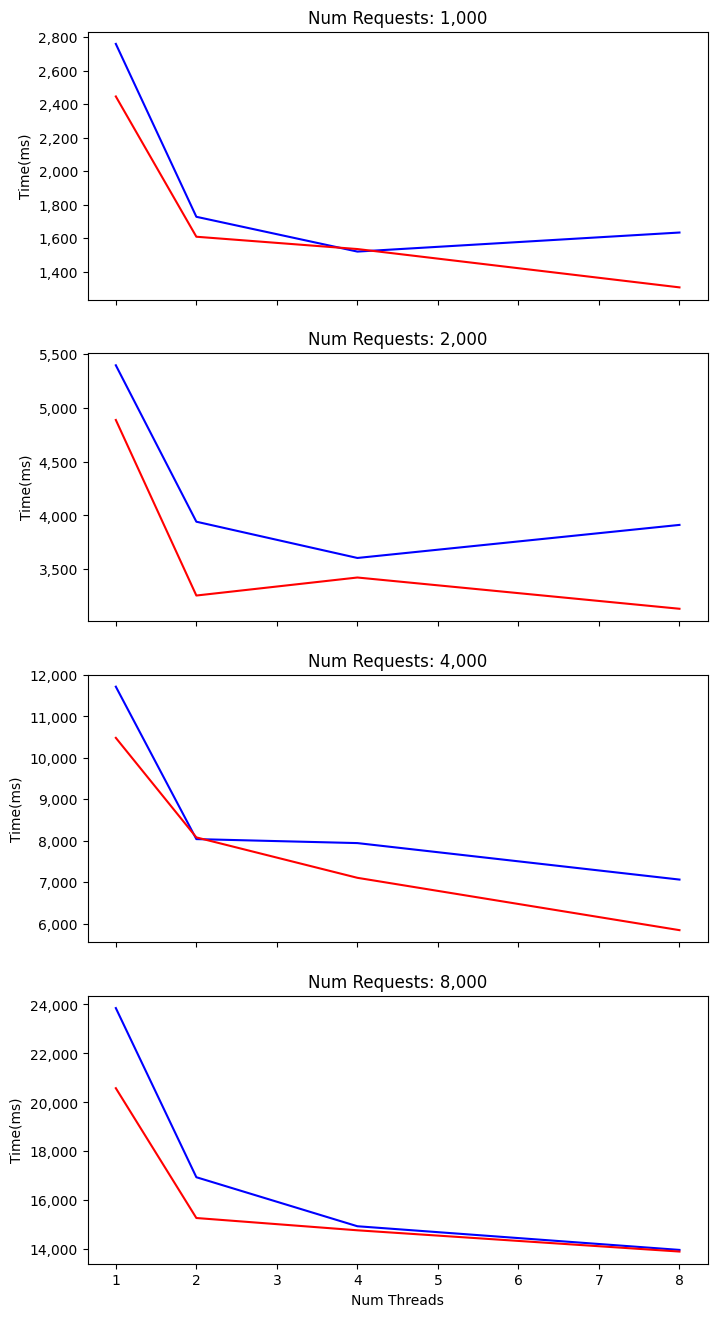

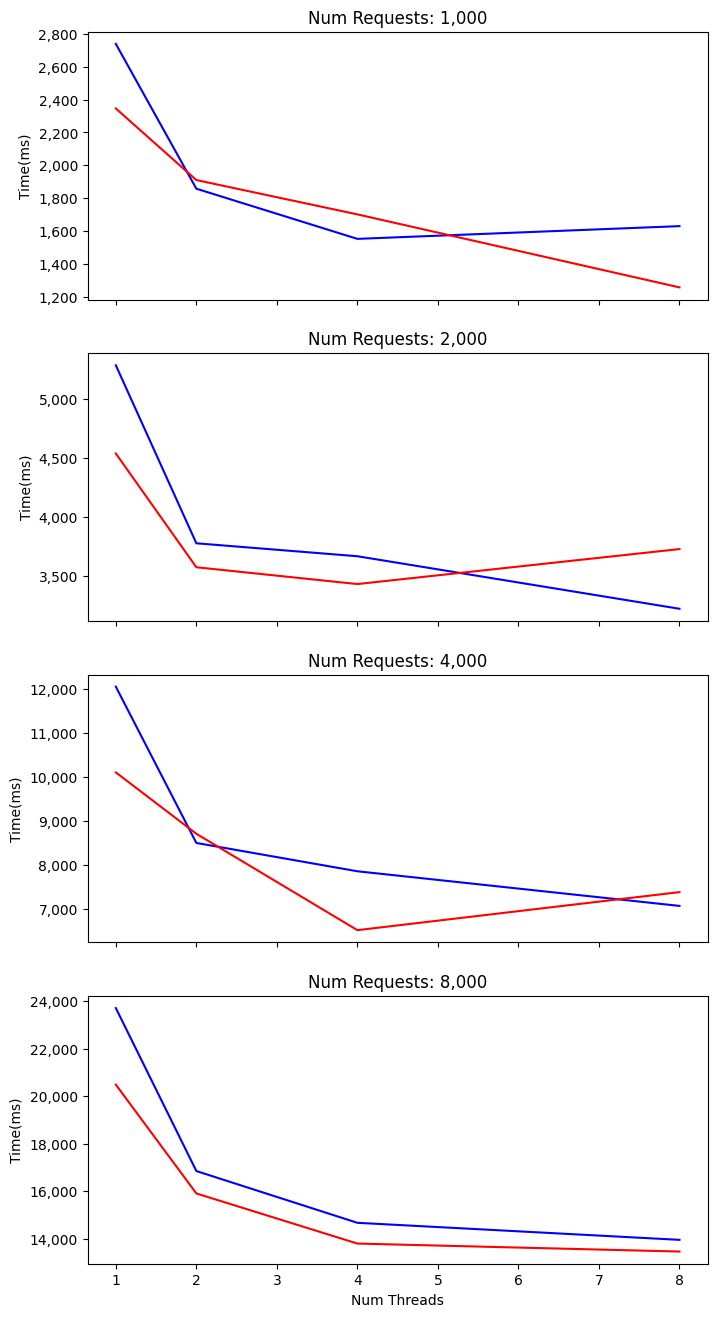

In [6]:
for task in ["hello_world", "route_testing", "json_parsing"]:
    fig, ax = plt.subplots(4, 1, figsize=(8, 16), sharex=True)
    plt.xlabel("Num Threads")
    for i, r in enumerate([1000, 2000, 4000, 8000]):
        ax[i].set_title(f"Num Requests: {r:,}")
        ax[i].set_ylabel("Time(ms)")
        ax[i].get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
        )
        tmp = fastapi.loc[(fastapi["requests"] == r) & (fastapi["task"] == task), :]
        ax[i].plot(tmp["threads"], tmp["time(ms)"], color="blue")
        tmp = axum.loc[(axum["requests"] == r) & (axum["task"] == task), :]
        ax[i].plot(tmp["threads"], tmp["time(ms)"], color="red")

    plt.savefig(f"../assets/{task}-times.png")